# Computer Vision

Online book: <https://www.learnpytorch.io/03_pytorch_computer_vision/>

## Example

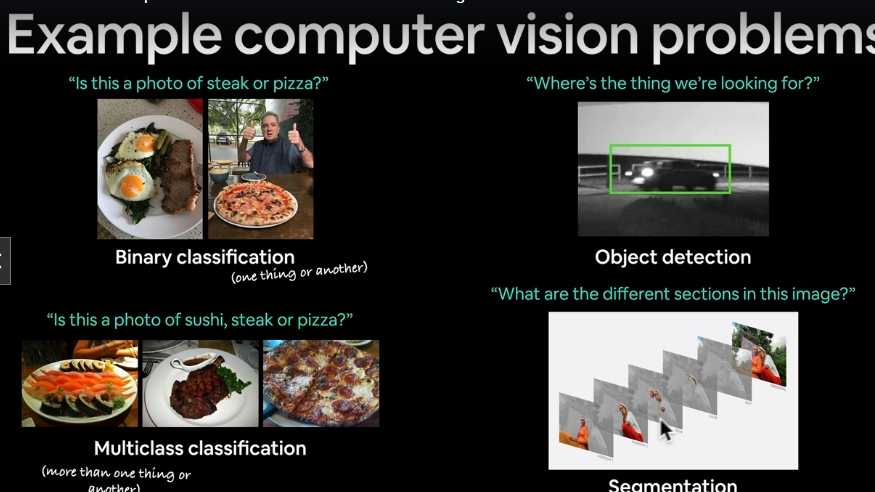

## Covering in this Notebook

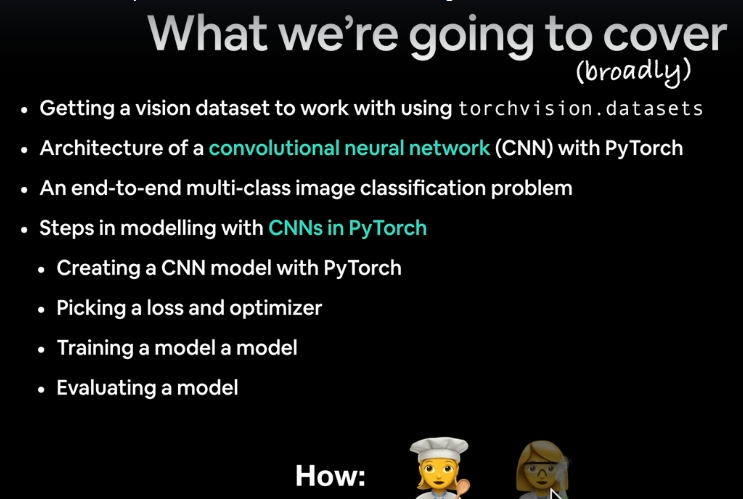

## Input and output shapes

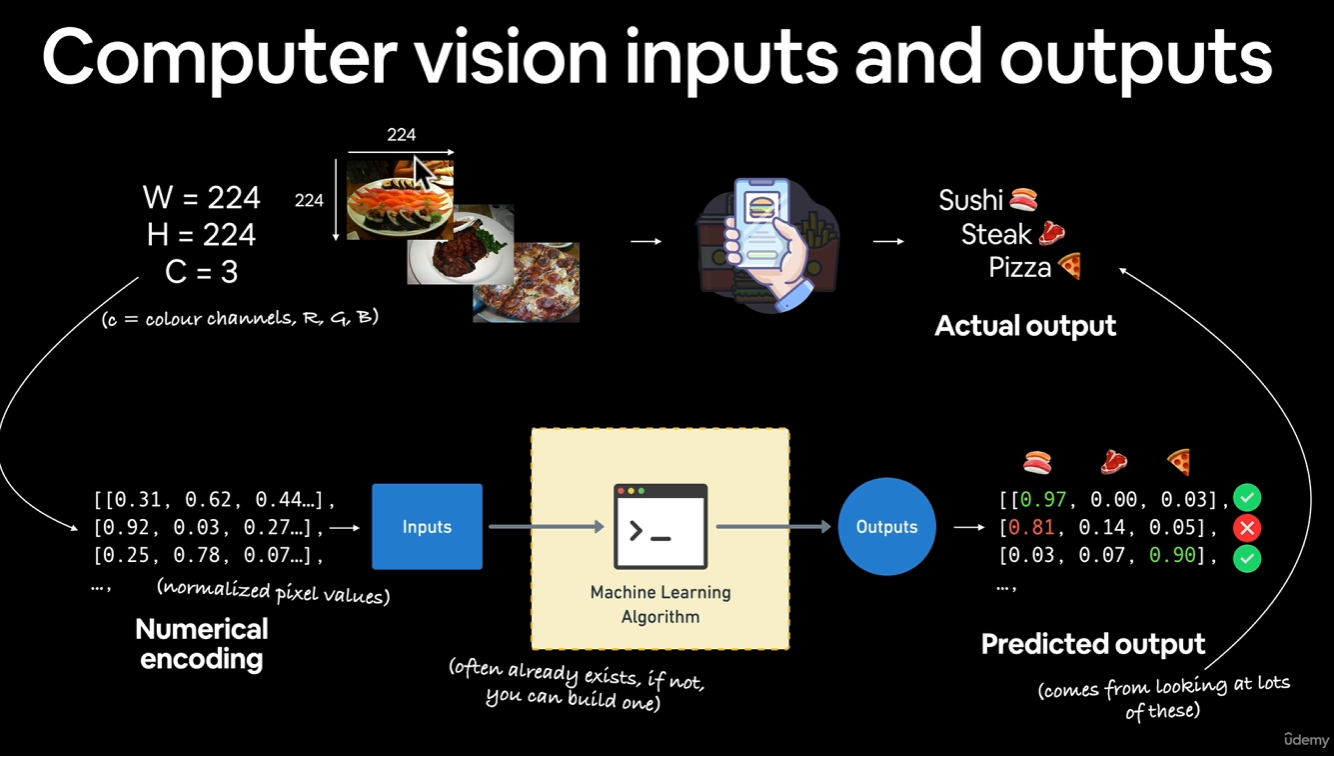

Convolutional neural networks (CNN) is best with image 

Transformer also works


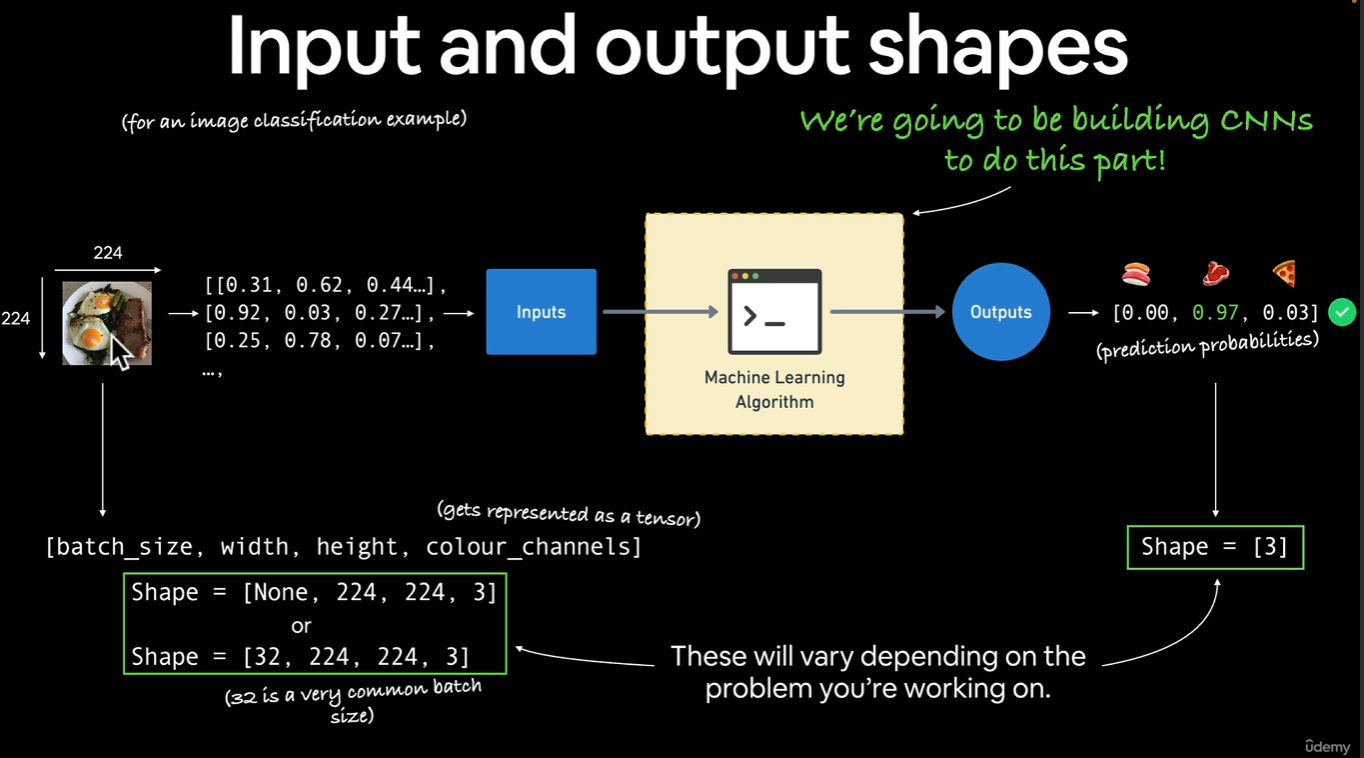

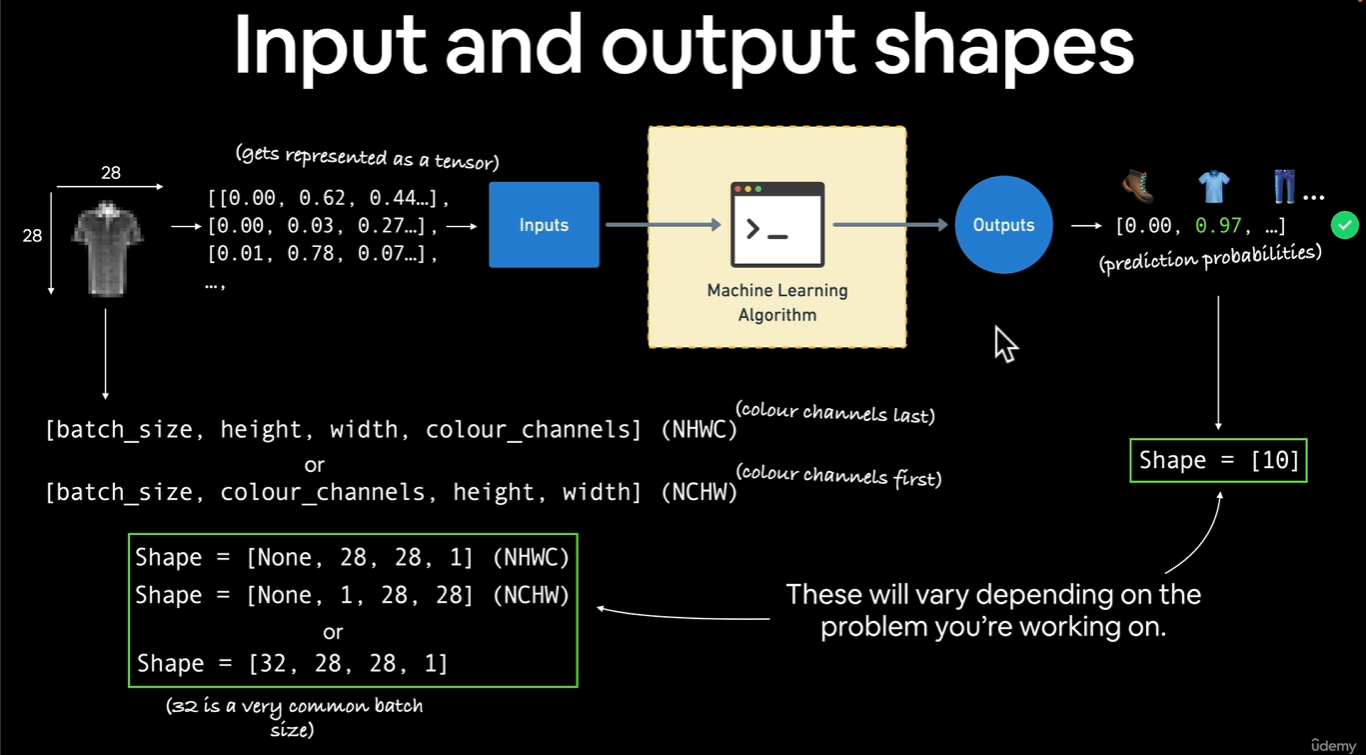

## Workflow

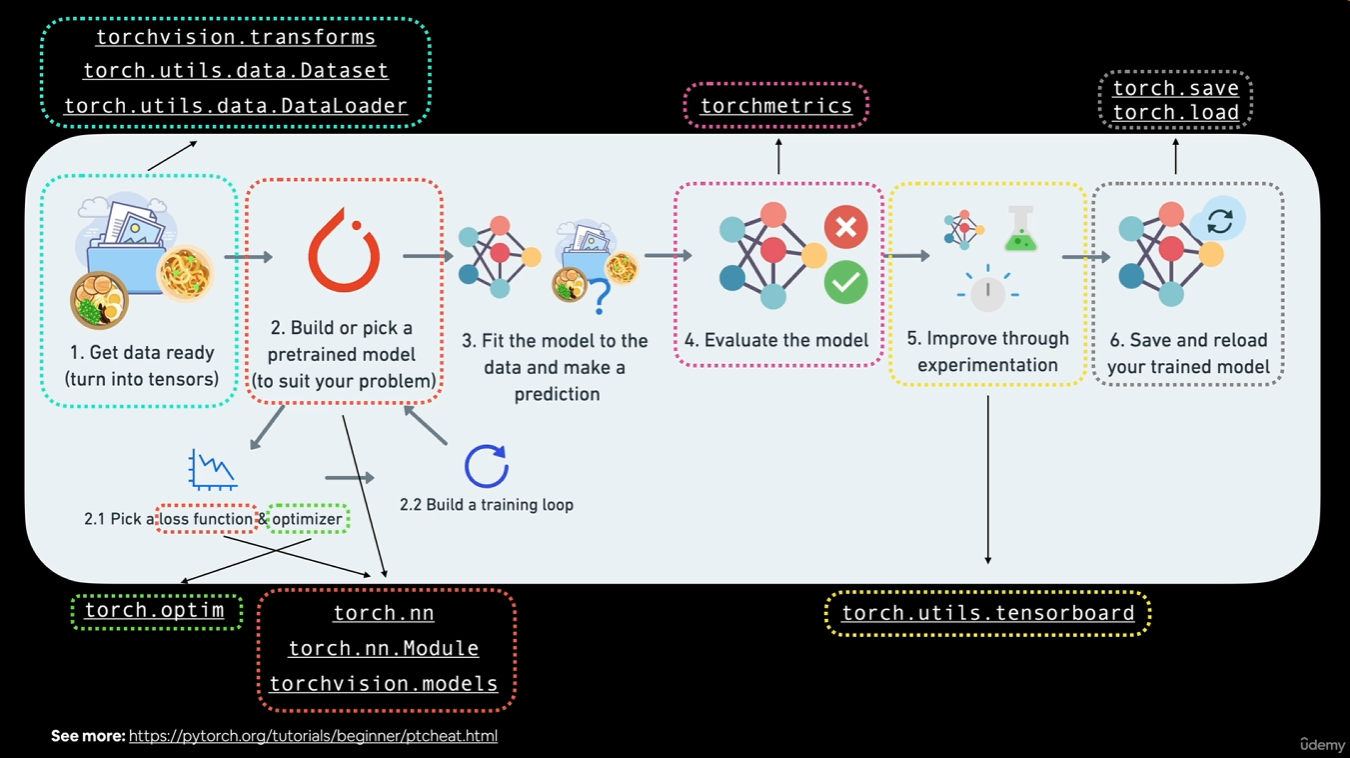

## Architecture of a CNN

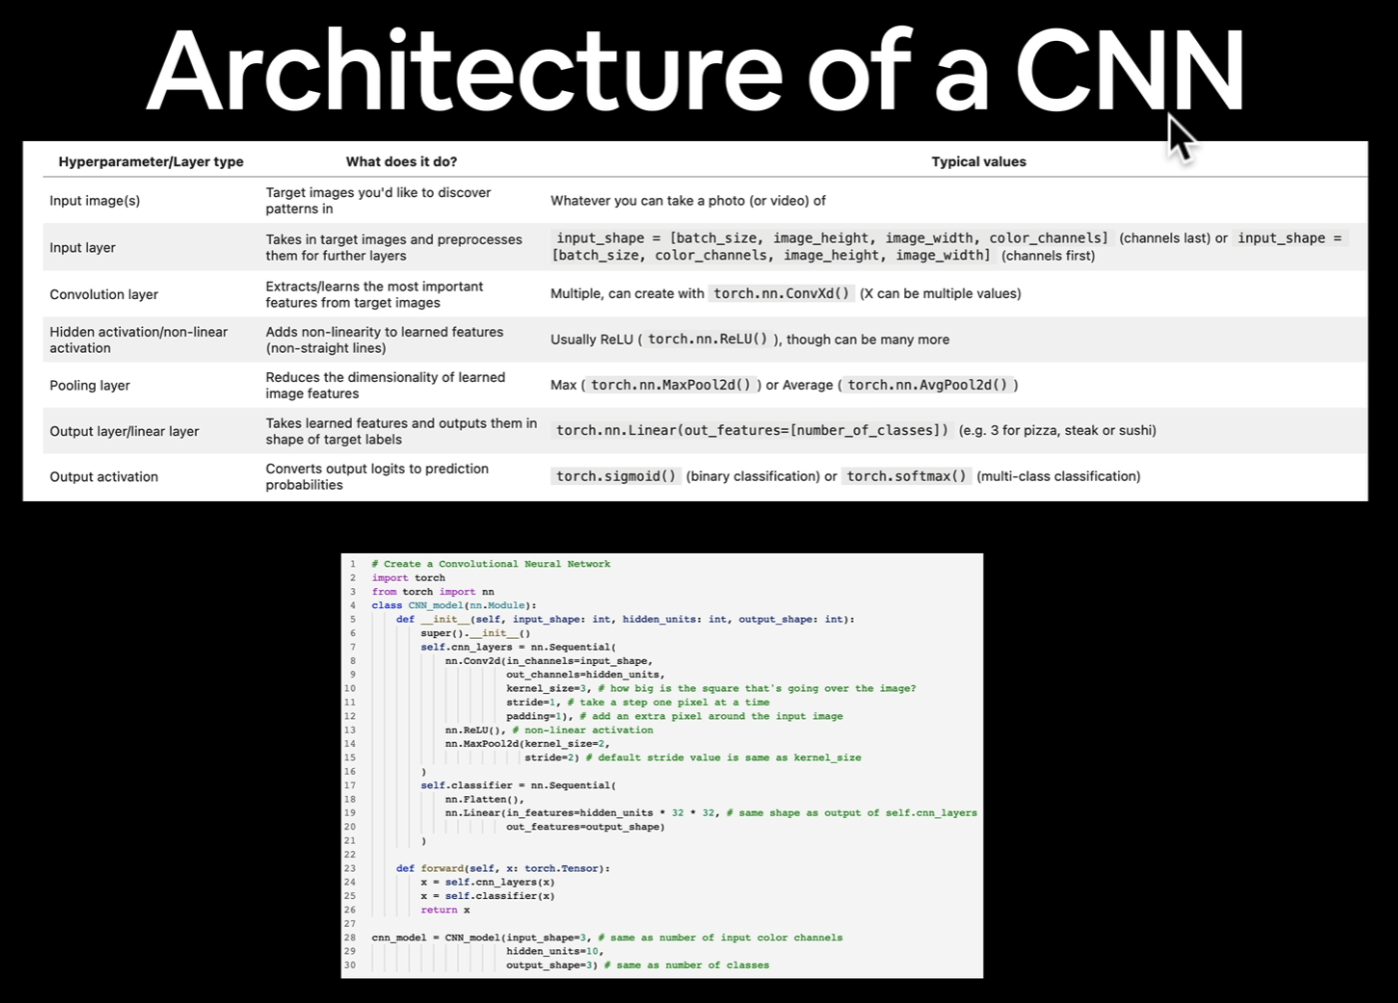

https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

## 0. Computer Vision Libaries in PyTorch

* `torchvision` - base domain library for pytorch
    * <https://pytorch.org/vision/stable/index.html>
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for an ML model
* `torch.utils.data.Dataset` - Base dataset clkass for PyTorch
* `torch.ultils.data.DataLoader` - Creates a Python iterable over a dataset

In [1]:
# Import Pytorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)


2.4.0
0.19.0


## 1. Getting a Dataset

The dataset we'll be using is **FasionMNIST** from `torchvision.datasets`
* <https://github.com/zalandoresearch/fashion-mnist>
* <https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html>

Target = what you are trying to predict (Labels)

In [2]:
## SET UP TRAINING AND TEST DATA ##

# Set up training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # Where to downbload the data
    train=True, # Do we want the training set? if False, we get the test set
    download=True, # Do we want to download the data? If False, we assume it is already downloaded
    transform=ToTensor(), # How we want to transform the data. In this case, we want to convert it to a tensor
    #transform=torchvision.transforms.ToTensor(), # Same as above
    target_transform=None # How do we want to transforms the labels/targets
)

# Set up test data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)


100.0%


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [3]:
# Check out atrributes of the data
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [12]:
print(f"Image shappe : {image.shape} -> [color_channels, height, width]")
print(f"Label : {label} -> {class_names[label]}")
# Label doesn't have a shape because it is a scalar (integer)
# It only has 1 color channel because it is a grayscale image

Image shappe : torch.Size([1, 28, 28]) -> [color_channels, height, width]
Label : 9 -> Ankle boot
